In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

data = pd.read_csv('MIL_101_Cr_data.csv')
data.head()

,Nucleating agent,n_nucleat,n_GdmCl,v_H2O,temperature,Label
0,none,0.0,0,4.8,220,MIL-101
1,none,0.0,0,4.8,218,MIL-101
2,NaOH,1.0,0,5.0,220,MIL-101
3,none,0.0,0,5.0,200,MIL-101
4,none,0.0,0,5.0,180,MIL-101


In [4]:
data_encoded = pd.get_dummies(data, columns=['Nucleating agent'])
data_encoded = data_encoded.drop('Nucleating agent_none', axis=1)
X=data_encoded.drop(['Label'],axis=1)
y=data_encoded.loc[:,'Label']
y.head()
X.head()

,n_nucleat,n_GdmCl,v_H2O,temperature,Nucleating agent_NH4F,Nucleating agent_NaF,Nucleating agent_NaOH
0,0.0,0,4.8,220,False,False,False
1,0.0,0,4.8,218,False,False,False
2,1.0,0,5.0,220,False,False,True
3,0.0,0,5.0,200,False,False,False
4,0.0,0,5.0,180,False,False,False


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = RandomForestClassifier(random_state=0)


param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],    
    'max_features': ['auto', 'sqrt', 'log2']  
}


grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)

y_predict_train = best_rf_model.predict(X_train)
y_predict_test = best_rf_model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_predict_train)
accuracy_test = accuracy_score(y_test, y_predict_test)

print("Best parameters found: ", best_params)
print("accuracy_train:", accuracy_train)
print("accuracy_test:", accuracy_test)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\ProgramData\Anaconda3\envs\mechinelearn\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
274 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\mechinelearn\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\envs\mechinelearn\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\Anaconda3\envs\mechinelearn\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validat

Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
accuracy_train: 1.0
accuracy_test: 0.8148148148148148


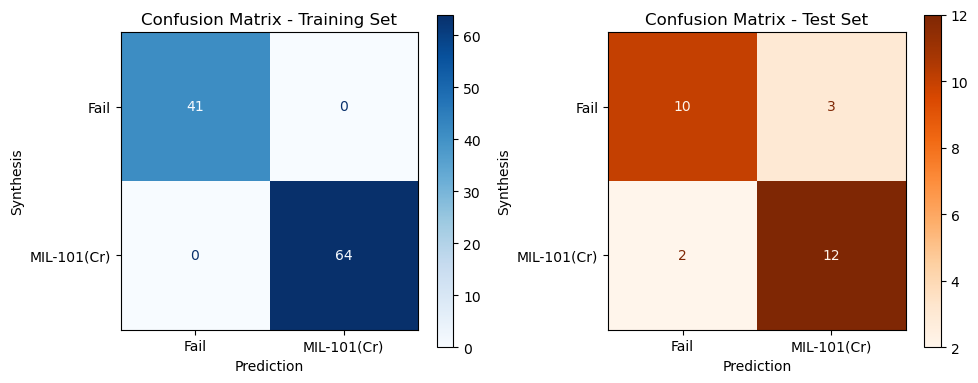

In [17]:
conf_matrix_train = confusion_matrix(y_train, y_predict_train)
conf_matrix_test = confusion_matrix(y_test, y_predict_test)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

disp_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=['Fail', 'MIL-101(Cr)'])
disp_train.plot(cmap=plt.cm.Blues, ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Synthesis')

disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=['Fail', 'MIL-101(Cr)'])
disp_test.plot(cmap=plt.cm.Oranges, ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Prediction')
ax[1].set_ylabel('Synthesis')

plt.tight_layout()

plt.savefig('confusion_matrices_Clf.png')

plt.show()


In [2]:
import joblib

model = clf 
model_path = 'clf_model.joblib'
joblib.dump(model, model_path)



NameError: name 'best_rf_model' is not defined